* [Bike Sharing Demand | Kaggle](https://www.kaggle.com/competitions/bike-sharing-demand)

## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
train = pd.read_csv("data/bike-sharing-demand/train.csv")

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("data/bike-sharing-demand/test.csv")

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 전처리
* 연, 월, 일, 시, 분, 초 만들기

In [4]:
train["datetime"] = pd.to_datetime(train["datetime"])
train["datetime"].head(1)

0   2011-01-01
Name: datetime, dtype: datetime64[ns]

In [5]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[['datetime', 'datetime-year', 'datetime-month', 
       'datetime-day', 'datetime-hour','datetime-minute', 
       'datetime-second', "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [6]:
test["datetime"] = pd.to_datetime(test["datetime"])
test["datetime"].head(1)

0   2011-01-20
Name: datetime, dtype: datetime64[ns]

In [7]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[['datetime', 'datetime-year', 'datetime-month', 
       'datetime-day', 'datetime-hour','datetime-minute', 
       'datetime-second', 'datetime-dayofweek']].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


## EDA

<img src="https://upload.wikimedia.org/wikipedia/commons/8/81/Logarithm_plots.png" width="500">


로그(log)는 지수 함수의 역함수이다. 어떤 수를 나타내기 위해 고정된 밑을 몇 번 곱하여야 하는지를 나타낸다고 볼 수 있다.

이른 17세기에 곱하기 및 나누기의 계산을 간편하게 해내기 위해 존 네이피어가 발명한 것으로 알려져 있다. 복잡한 단위의 계산을 간편하게 계산할 수 있다는 장점 때문에, 로그표 및 계산자 등의 발명품과 함께 세계적으로 여러 분야의 학자들에게 널리 퍼졌다.

지수에 대비된다는 의미에서 중국과 일본에서는 대수(對數)로 부르기도 하나, 대수(代數, algebra)와 헷갈리기 쉬우므로 로그라는 용어를 사용하는 것이 일반적이다.


* https://en.wikipedia.org/wiki/Logarithm
* [로그 (수학) - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8_(%EC%88%98%ED%95%99))
* [자연로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8)
* [상용로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9A%A9%EB%A1%9C%EA%B7%B8)

<AxesSubplot:xlabel='count', ylabel='Density'>

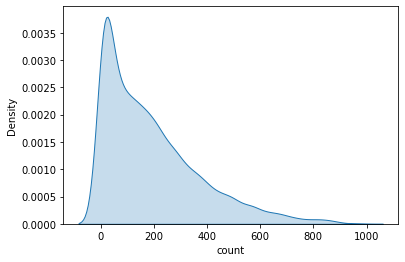

In [8]:
# count - kdeplot
sns.kdeplot(data = train, x ="count", shade = True)

In [9]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

<AxesSubplot:xlabel='count_log1p', ylabel='Density'>

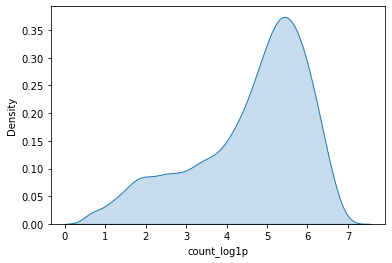

In [10]:
# count log1p - kdeplot
# train['count_log1p'] = np.log(train['count'] + 1)
train['count_log1p'] = np.log1p(train['count']) # 위 식이랑 같은 거임
sns.kdeplot(data = train, x = 'count_log1p', shade = True)

In [11]:
train['count_log1p'].describe()

count    10886.000000
mean         4.591364
std          1.419454
min          0.693147
25%          3.761200
50%          4.983607
75%          5.652489
max          6.885510
Name: count_log1p, dtype: float64

<AxesSubplot:xlabel='count_expm1', ylabel='Density'>

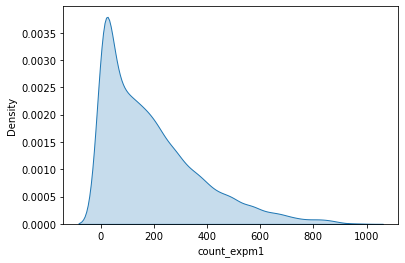

In [12]:
# count expm1 - kdeplot
train['count_expm1'] = np.expm1(train['count_log1p']) # 그냥 np.expm() - 1 해도됌
sns.kdeplot(data = train, x = 'count_expm1', shade = True)

In [13]:
# count, log1p, expm1
train[['count', 'count_log1p', 'count_expm1']].describe()

,count,count_log1p,count_expm1
count,10886.000000,10886.000000,10886.000000
mean,191.574132,4.591364,191.574132
std,181.144454,1.419454,181.144454
min,1.000000,0.693147,1.000000
25%,42.000000,3.761200,42.000000
50%,145.000000,4.983607,145.000000
75%,284.000000,5.652489,284.000000
max,977.000000,6.885510,977.000000


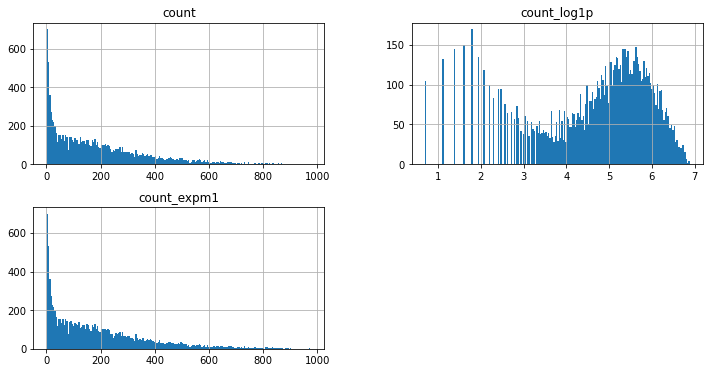

In [14]:
_ = train[['count', 'count_log1p', 'count_expm1']].hist(figsize = (12, 6), bins = 200)

In [15]:
train['datetime-year-month'] = train['datetime'].astype(str).str[:7]

<AxesSubplot:xlabel='datetime-year-month', ylabel='count'>

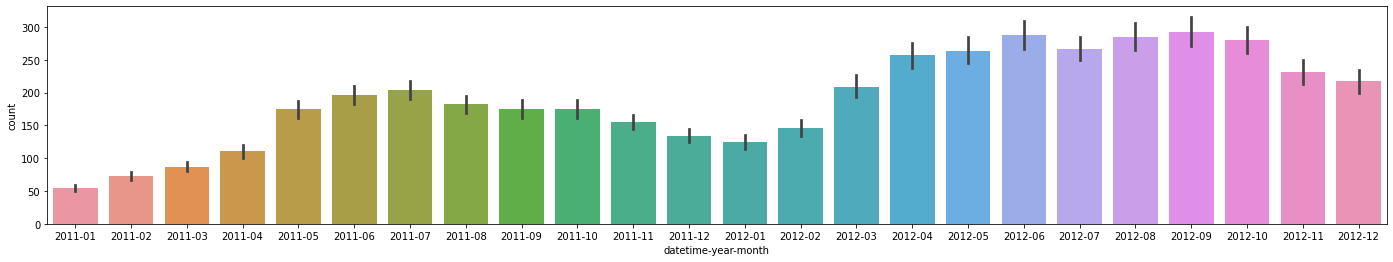

In [16]:
plt.figure(figsize = (24,4))
sns.barplot(data = train, x = 'datetime-year-month', y = 'count')

## 학습, 예측 데이터셋 만들기

<img src="https://i.imgur.com/yvBtRtJ.png" width="600">


* feature_names : 학습(훈련), 예측에 사용할 컬럼을 리스트 형태로 만들어서 변수에 담아줍니다.
* label_name : 정답값

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)

* submit
    * sample_submission file을 불러옵니다.
    * 예측한 값을 옮겨 적습니다.
    * 캐글에 제출합니다.

In [17]:
train.groupby(['datetime-year','datetime-month'])

In [18]:
# feature_names : 학습, 예측에 사용할 컬럼명(변수)
# feature_names
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'count_log1p', 'count_expm1', 'datetime-year-month'],
      dtype='object')

In [19]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
                'humidity', 'windspeed', 'datetime-year',
                'datetime-hour', 'datetime-dayofweek' ]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [20]:
# label_name : 정답값
label_name = 'count_log1p'

In [21]:
# 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제
# X_train
X_train = train[feature_names]
print(X_train.shape)
X_train.head(2)

(10886, 10)


,season,holiday,workingday,weather,temp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,81,0.0,2011,0,5
1,1,0,0,1,9.02,80,0.0,2011,1,5


In [22]:
# 예측 데이터셋, 예) 실전 시험 문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head(2)

(6493, 10)


,season,holiday,workingday,weather,temp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,56,26.0027,2011,0,3
1,1,0,1,1,10.66,56,0.0000,2011,1,3


In [23]:
# 학습(훈련)에 사용할 정답값 예) 기출문제의 정답
# log1p
y_train = train[label_name]
print(y_train.shape)
y_train.head(2)

(10886,)


0    2.833213
1    3.713572
Name: count_log1p, dtype: float64

## 머신러닝 알고리즘

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model

RandomForestRegressor(random_state=42)

## GridSearchCV or RandomizedSearchCV

In [25]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [39]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'n_estimators' : np.random.randint(100, 1000, 100),
                        'max_depth' : np.random.randint(10, 200, 100)
                      }


reg = RandomizedSearchCV(model, param_distributions = param_distributions, n_iter = 3, cv = 3, n_jobs = -1, scoring = 'neg_root_mean_squared_error')
reg.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': array([ 47, 164,  65,  95, 132,  85,  78, 186,  13, 110, 170,  76,  63,
       117,  53, 162,  30,  69, 191, 148,  34, 140,  13, 101,  28,  62,
        31, 187, 145, 175, 163, 102,  22, 104,  26,  16, 112, 157, 111,
       184, 167,  76, 135,  69, 152,  51,  99, 125, 118,  81, 182,  88,
       182,  72, 197, 104, 174, 150,  36, 104, 126,  8...
       776, 412, 112, 945, 267, 686, 255, 115, 120, 499, 315, 847, 938,
       257, 580, 982, 327, 851, 930, 824, 763, 888, 823, 347, 536, 317,
       425, 631, 688, 514, 293, 398, 497, 684, 692, 633, 182, 142, 452,
       903, 428, 348, 843, 970, 363, 661, 796, 403, 795, 338, 331, 231,
       656, 810, 469, 210, 507, 268, 684, 669, 219, 717, 848, 950, 225,
       339, 864, 530, 260, 290, 463, 385, 366, 839, 531, 400, 846, 922,
       937, 550, 417, 925, 974, 308, 940, 409, 828])},
                   scoring='neg_root_mean_squared_error')

In [27]:
best_model = reg.best_estimator_
best_model

RandomForestRegressor(max_depth=157, n_estimators=950, random_state=42)

In [28]:
reg.best_score_

-0.5069812965803755

In [29]:
y_predict = reg.predict(X_test)
y_predict[:10]

array([2.51097765, 1.68423116, 1.44123514, 1.38040214, 1.28732798,
       1.94628259, 3.67052989, 4.68532822, 5.48571262, 4.91573499])

In [30]:
pd.DataFrame(reg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,16.633922,0.072774,0.354440,0.049616,868,102,"{'n_estimators': 868, 'max_depth': 102}",-0.631985,-0.431072,-0.586327,-0.378924,-0.507077,0.104979,2
1,11.067880,0.169185,0.206775,0.021096,574,132,"{'n_estimators': 574, 'max_depth': 132}",-0.632651,-0.430254,-0.587244,-0.379398,-0.507387,0.105355,4
2,5.655122,0.193153,0.116618,0.016130,288,54,"{'n_estimators': 288, 'max_depth': 54}",-0.632352,-0.432424,-0.588032,-0.378432,-0.507810,0.105318,5
3,14.479819,0.056913,0.290306,0.017141,845,37,"{'n_estimators': 845, 'max_depth': 37}",-0.632132,-0.430968,-0.586252,-0.379074,-0.507107,0.104982,3
4,15.509795,0.612944,0.304603,0.019037,950,157,"{'n_estimators': 950, 'max_depth': 157}",-0.631958,-0.430728,-0.586278,-0.378962,-0.506981,0.105013,1


<AxesSubplot:>

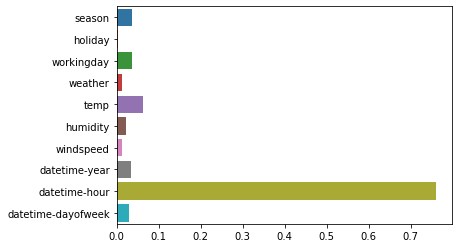

In [31]:
sns.barplot(x = best_model.feature_importances_, y = reg.feature_names_in_)

## 평가

### MSE(Mean Squared Error)

In [43]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(best_model, X_train, y_train, cv=3)
y_valid_predict

array([4.2104504 , 4.07475605, 3.86279264, ..., 5.10211977, 4.82915622,
       4.04316553])

In [44]:
mse = ((y_train - y_valid_predict) ** 2).mean()
mse

0.2785969123492149

In [45]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_valid_predict)

0.2785969123492143

### RMSE(Root Mean Squared Error)

In [46]:
np.sqrt(mse)

0.5278228039306514

### RMSLE(Root Mean Squared Logarithmic Error)

## 학습과 예측

In [32]:
# 실전 시험 문제(X_test)를 풀어봅니다.


In [33]:
# 피처 중요도 


## Submit

In [34]:
# 답안지 양식을 불러옵니다.
df_submit = pd.read_csv("data/bike-sharing-demand/sampleSubmission.csv")
df_submit.shape

(6493, 2)

In [35]:
# 예측한 값을 답안지에 옮겨 적습니다
df_submit['count'] = np.expm1(y_predict)
df_submit.head()

,datetime,count
0,2011-01-20 00:00:00,11.316966
1,2011-01-20 01:00:00,4.388307
2,2011-01-20 02:00:00,3.225912
3,2011-01-20 03:00:00,2.976500
4,2011-01-20 04:00:00,2.623093


In [36]:
file_name = f'submit_{reg.best_score_:.5f}.csv'
file_name

'submit_-0.50698.csv'

In [37]:
# 캐글에 제출하기 위해 csv 파일로 저장합니다.
df_submit.to_csv(file_name, index = False)

In [38]:
# 파일 저장이 제대로 되었는지 확인합니다.
pd.read_csv(file_name)

,datetime,count
0,2011-01-20 00:00:00,11.316966
1,2011-01-20 01:00:00,4.388307
2,2011-01-20 02:00:00,3.225912
3,2011-01-20 03:00:00,2.976500
4,2011-01-20 04:00:00,2.623093
...,...,...
6488,2012-12-31 19:00:00,202.871547
6489,2012-12-31 20:00:00,159.389704
6490,2012-12-31 21:00:00,107.805203
6491,2012-12-31 22:00:00,95.172989
